In [409]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

# DATA:

In [410]:
d = pd.read_csv("Airline_data.csv", sep=',')
d

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0
5,1981,21,362,6033.0
6,1982,26,764,5877.0
7,1983,20,809,6223.0
8,1984,16,223,7433.0
9,1985,22,1066,7107.0


In [411]:
# Choosing parameters for such large values of 'Miles flown [100 mln miles]' was problematic so I scaled these values to smaller numbers with an mean of 0.
d['Miles flown [100 mln miles]'] /= 1000
d['Miles flown [100 mln miles]'] = d['Miles flown [100 mln miles]'] - d['Miles flown [100 mln miles]'].mean()
d

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,-1.8528
1,1977,25,516,-1.4158
2,1978,31,754,-0.6888
3,1979,31,877,-0.2348
4,1980,22,814,0.0982
5,1981,21,362,0.3172
6,1982,26,764,0.1612
7,1983,20,809,0.5072
8,1984,16,223,1.7172
9,1985,22,1066,1.3912


In [412]:
d["Fatal accidents"].mean() # checked after prior implementation

23.8

In [413]:
d["Miles flown [100 mln miles]"].std() # checked after prior implementation

1.117767795404951

# PRIOR:

In [414]:
model_0=CmdStanModel(stan_file='code_0.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [415]:
samples = model_0.sample(data={}, fixed_param=True, iter_sampling=1000, iter_warmup=0, chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [416]:
df = samples.draws_pd()
df

,lp__,accept_stat__,alpha,theta,n,lambda,y
0,0.0,0.0,3.77928,0.611242,-0.973801,24.14440,23.0
1,0.0,0.0,3.19943,0.400002,2.787650,74.77600,58.0
2,0.0,0.0,2.94925,0.608804,-0.732777,12.22070,12.0
3,0.0,0.0,2.45974,0.620608,0.014364,11.80660,13.0
4,0.0,0.0,2.31165,0.531113,-0.661309,7.10232,4.0
...,...,...,...,...,...,...,...
995,0.0,0.0,3.51340,0.451845,-0.615245,25.41670,18.0
996,0.0,0.0,1.20228,0.553799,1.290800,6.80135,3.0
997,0.0,0.0,4.55359,0.655937,-1.726290,30.60780,37.0
998,0.0,0.0,3.32450,0.511053,-0.936416,17.21780,15.0


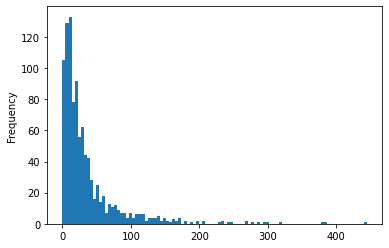

In [417]:
df['y'].plot.hist(bins=100)
plt.show()

In [418]:
df['y'].mean()

36.677

# POSTERIOR:

In [419]:
model_1=CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [420]:
fit = model_1.sample(data={"N": d.shape[0], "n_i": d["Miles flown [100 mln miles]"].values, "y": d["Fatal accidents"].values})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [421]:
df = fit.draws_pd()
df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,theta,lambda[1],...,y_pred[1],y_pred[2],y_pred[3],y_pred[4],y_pred[5],y_pred[6],y_pred[7],y_pred[8],y_pred[9],y_pred[10]
0,503.318,0.924305,0.762865,2.0,3.0,0.0,-503.088,3.23207,0.121330,20.2320,...,24.0,14.0,29.0,26.0,17.0,22.0,24.0,27.0,24.0,27.0
1,503.855,1.000000,0.762865,1.0,1.0,0.0,-503.357,3.22648,0.098362,20.9939,...,15.0,22.0,23.0,20.0,31.0,24.0,30.0,24.0,23.0,29.0
2,503.924,0.782222,0.762865,1.0,3.0,0.0,-501.414,3.15437,0.003532,23.2854,...,27.0,25.0,34.0,21.0,31.0,28.0,20.0,24.0,29.0,23.0
3,504.486,0.947938,0.762865,3.0,7.0,0.0,-503.275,3.17627,0.040919,22.2080,...,24.0,16.0,33.0,22.0,27.0,17.0,23.0,24.0,27.0,22.0
4,503.730,0.927432,0.762865,2.0,3.0,0.0,-503.632,3.24087,0.028566,24.2386,...,23.0,29.0,22.0,22.0,23.0,32.0,22.0,24.0,28.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,504.331,0.974092,0.759231,2.0,7.0,0.0,-503.574,3.12531,0.079551,19.6468,...,21.0,25.0,28.0,16.0,16.0,16.0,23.0,19.0,18.0,27.0
3996,503.492,0.914450,0.759231,3.0,7.0,0.0,-503.270,3.08133,0.028794,20.6554,...,21.0,22.0,16.0,30.0,20.0,19.0,23.0,24.0,18.0,14.0
3997,504.376,0.876425,0.759231,2.0,3.0,0.0,-502.117,3.17453,0.094232,20.0842,...,24.0,18.0,22.0,23.0,27.0,24.0,22.0,26.0,24.0,27.0
3998,504.511,1.000000,0.759231,2.0,3.0,0.0,-504.312,3.18721,0.070339,21.2613,...,17.0,21.0,20.0,31.0,25.0,22.0,20.0,25.0,23.0,26.0


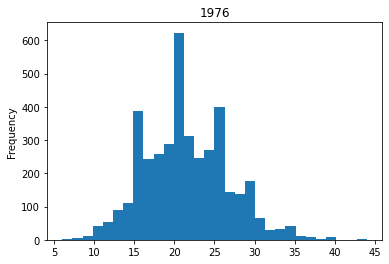

Observed data:  24
Simulated data mean:  21.43925


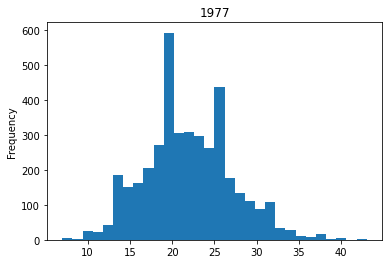

Observed data:  25
Simulated data mean:  21.85175


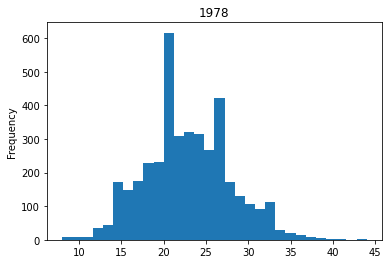

Observed data:  31
Simulated data mean:  22.749


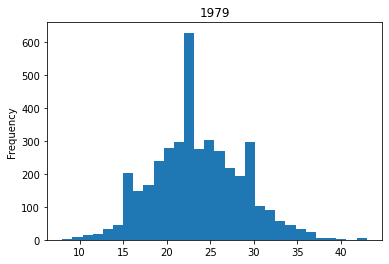

Observed data:  31
Simulated data mean:  23.49825


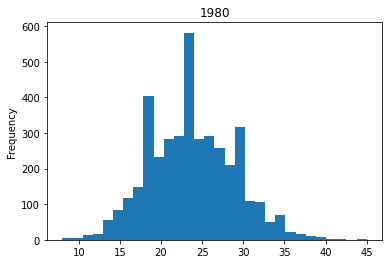

Observed data:  22
Simulated data mean:  23.806


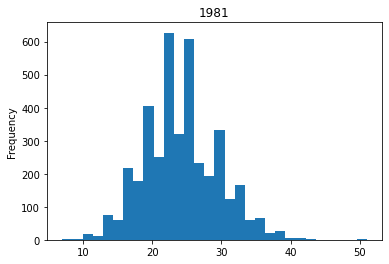

Observed data:  21
Simulated data mean:  24.185


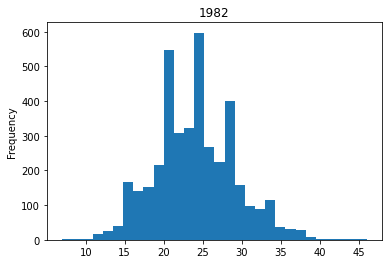

Observed data:  26
Simulated data mean:  23.97425


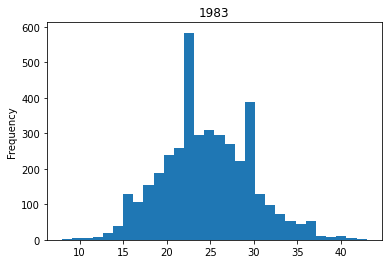

Observed data:  20
Simulated data mean:  24.5315


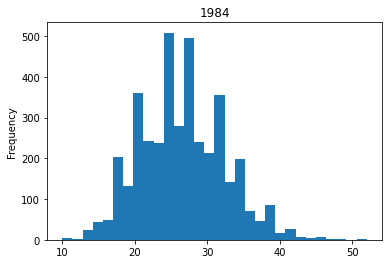

Observed data:  16
Simulated data mean:  26.481


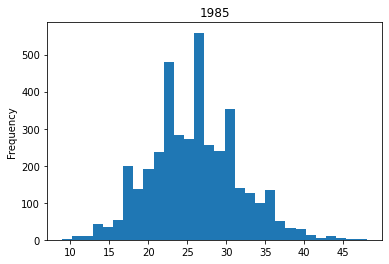

Observed data:  22
Simulated data mean:  25.8685


In [422]:
for year in range(1, 11):
    year_number = "y_pred[" + str(year) + "]"
    title = 1975 + year
    df[year_number].plot.hist(bins=30, title =title)
    plt.show()
    print("Observed data: ", d["Fatal accidents"][year-1])
    print("Simulated data mean: ", df[year_number].mean())

#### When we use single intercept alpha posterior distributions don't fit the data precisely.
#### Despite the high variability in the observed data, the simulated data for all years are similar.

<br> <br>

# Individual intercepts of alpha for each year:

In [423]:
model_2=CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [424]:
fit = model_2.sample(data={"N": d.shape[0], "n_i": d["Miles flown [100 mln miles]"].values, "y": d["Fatal accidents"].values})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [425]:
df = fit.draws_pd()
df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha[1],alpha[2],alpha[3],...,y_pred[1],y_pred[2],y_pred[3],y_pred[4],y_pred[5],y_pred[6],y_pred[7],y_pred[8],y_pred[9],y_pred[10]
0,514.382,0.891905,0.392022,3.0,15.0,0.0,-510.550,3.87958,3.83081,3.68163,...,29.0,27.0,30.0,27.0,25.0,10.0,17.0,18.0,17.0,18.0
1,511.316,0.941868,0.392022,3.0,7.0,0.0,-508.326,4.07224,3.50344,3.89205,...,27.0,14.0,30.0,29.0,26.0,25.0,15.0,23.0,27.0,12.0
2,511.844,0.950104,0.392022,3.0,7.0,0.0,-504.614,3.74310,4.27141,3.89562,...,16.0,44.0,33.0,35.0,10.0,20.0,18.0,10.0,24.0,22.0
3,509.044,0.971156,0.392022,3.0,7.0,0.0,-502.749,4.01689,3.67920,3.59953,...,18.0,15.0,29.0,35.0,23.0,8.0,21.0,11.0,20.0,25.0
4,513.118,0.969465,0.392022,3.0,7.0,0.0,-502.639,4.09437,4.12326,4.06474,...,26.0,35.0,43.0,43.0,28.0,30.0,21.0,32.0,17.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,515.459,0.971145,0.449565,3.0,15.0,0.0,-512.493,3.94313,3.78517,3.65804,...,15.0,17.0,31.0,33.0,24.0,12.0,29.0,24.0,18.0,32.0
3996,507.973,0.721220,0.449565,3.0,7.0,0.0,-502.379,4.04624,3.98493,3.63066,...,25.0,26.0,31.0,12.0,18.0,8.0,28.0,18.0,11.0,21.0
3997,512.709,0.974785,0.449565,3.0,15.0,0.0,-501.659,3.74812,3.57196,3.29012,...,21.0,29.0,18.0,32.0,18.0,17.0,36.0,21.0,15.0,22.0
3998,514.321,0.992353,0.449565,3.0,7.0,0.0,-510.044,3.72475,3.58692,3.34806,...,17.0,24.0,32.0,35.0,24.0,15.0,25.0,27.0,17.0,23.0


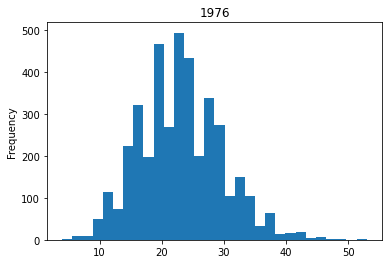

Observed data:  24
Simulated data mean:  23.018


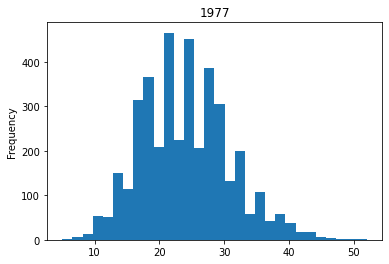

Observed data:  25
Simulated data mean:  24.06225


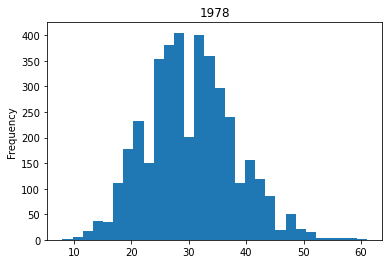

Observed data:  31
Simulated data mean:  30.32


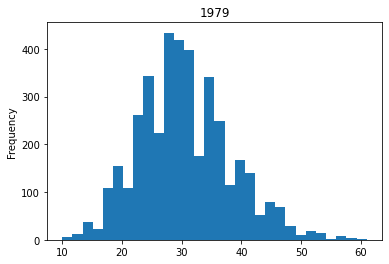

Observed data:  31
Simulated data mean:  30.51175


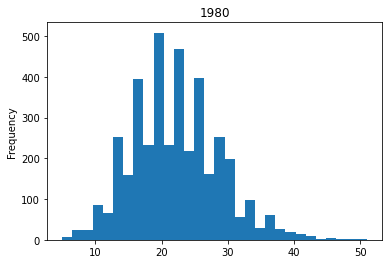

Observed data:  22
Simulated data mean:  22.074


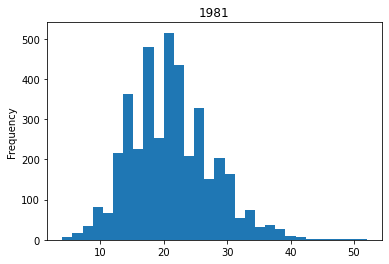

Observed data:  21
Simulated data mean:  21.017


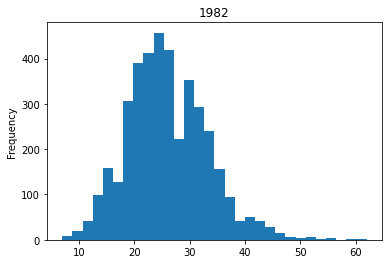

Observed data:  26
Simulated data mean:  25.88425


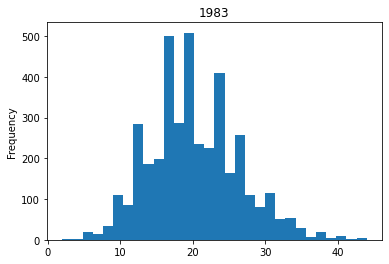

Observed data:  20
Simulated data mean:  20.10475


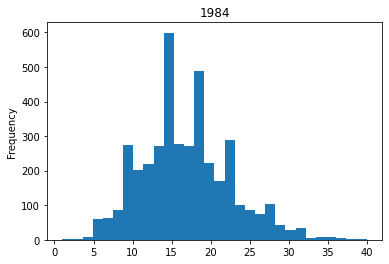

Observed data:  16
Simulated data mean:  16.81325


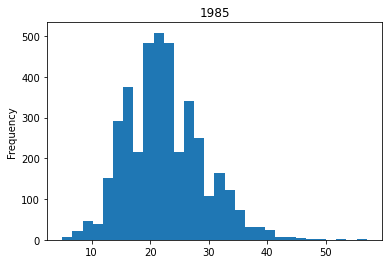

Observed data:  22
Simulated data mean:  22.44375


In [426]:
for year in range(1, 11):
    year_number = "y_pred[" + str(year) + "]"
    title = 1975 + year
    df[year_number].plot.hist(bins=30, title =title)
    plt.show()
    print("Observed data: ", d["Fatal accidents"][year-1])
    print("Simulated data mean: ", df[year_number].mean())

#### After selecting individual alpha parameters for each year, the model fits the data much more precisely.